In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import os

In [3]:
path_to_folder = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_6/lesson_6_csv_fille/'
os.listdir(path_to_folder)

['sales_team.csv', 'order_leads.csv', 'invoices.csv']

In [5]:
sales_team = pd.read_csv(path_to_folder + 'sales_team.csv')

In [9]:
order_leads = pd.read_csv(path_to_folder + 'order_leads.csv')

In [8]:
invoices = pd.read_csv(path_to_folder + 'invoices.csv')

In [10]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [12]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Sales Rep'   : 'Sales_Rep', 
                                        'Sales_Rep_Id': 'Sales Rep Id'})

In [20]:
order_leads.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [14]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

In [18]:
order_leads = order_leads.rename(columns={'Order Id'    : 'Order_Id', 
                                          'Company Id'  : 'Company_Id', 
                                          'Company Name': 'Company_Name', 
                                          'Order Value' : 'Order_Value'})

In [87]:
order_leads_with_team_data = order_leads.merge(sales_team, on=['Company_Id', 'Company_Name'], how='left')

In [88]:
order_leads_with_team_data.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted,Sales_Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [98]:
top_sales = order_leads_with_team_data.groupby('Sales_Rep', as_index=False)\
    .agg({'Converted':'mean'})\
    .rename(columns={'Converted':'CR'})\
    .sort_values('CR')\
    .tail(10)

In [101]:
top_sales

,Sales_Rep,CR
346,Nick Allen,0.298507
192,Jennifer Peck,0.304348
468,Thomas Lindsey,0.304348
187,Jason Miller,0.307692
455,Teddy Cook,0.315789
225,Jose Gaines,0.326087
249,Katie Rodriquez,0.333333
466,Thomas Fortner,0.352941
438,Sierra Garcia,0.363636
151,Ginger Wright,0.368421


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%')]

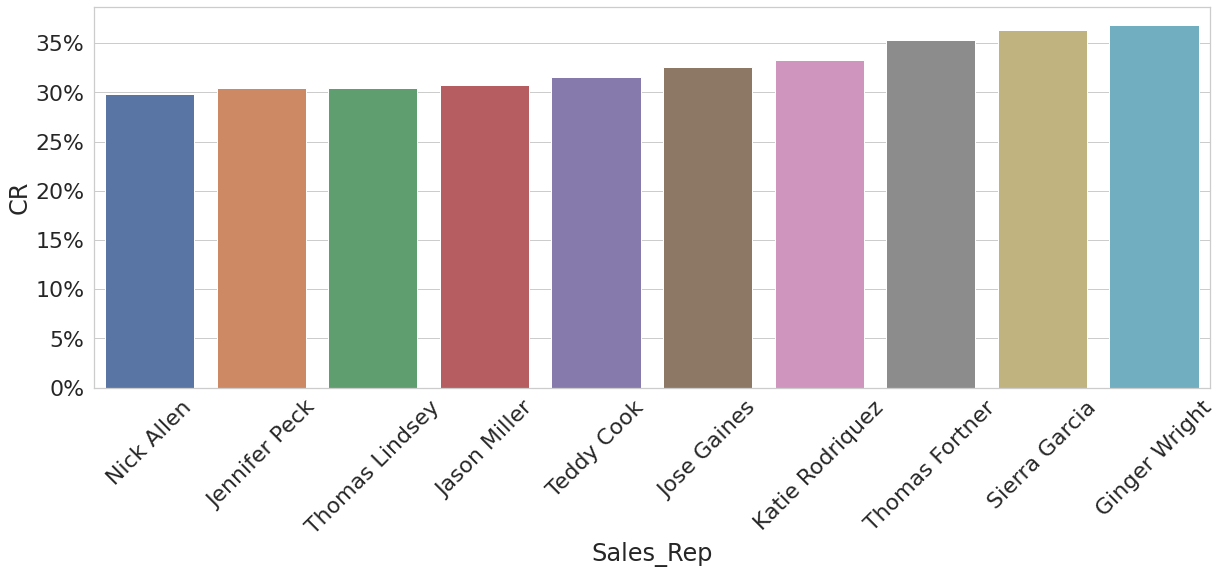

In [116]:
ax = sns.barplot(data=top_sales, x='Sales_Rep', y='CR')
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45)
ax.set_yticklabels(['{:.0%}'.format(item) for item in ax.get_yticks()])

In [117]:
comp_sales = order_leads_with_team_data.groupby('Sales_Rep', as_index=False)\
    .agg({'Converted':'mean'})\
    .rename(columns={'Converted':'CR'})\
    .sort_values('CR')


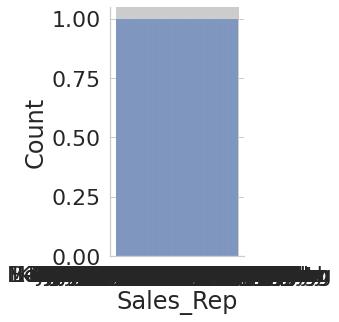

In [118]:
sns.displot(comp_sales.Sales_Rep)

In [19]:
#График CR по дням

In [44]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [45]:
cr_by_day = order_leads.groupby(['Date'])\
    .agg({'Converted':'mean'})\
    .sort_values('Date')\
    .rename(columns={'Converted':'CR'})

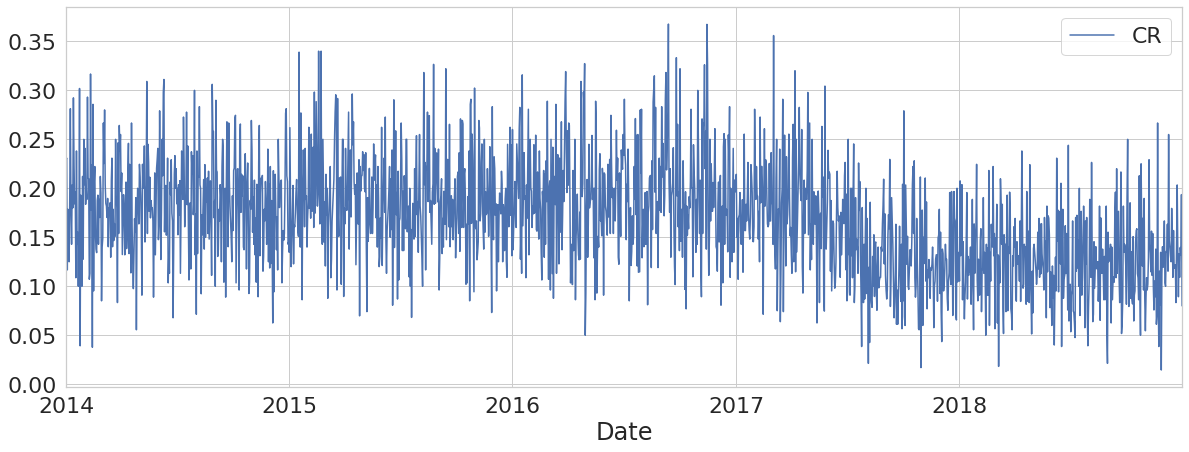

In [46]:
ax = cr_by_day.plot()

In [47]:
cr_by_day_rolling_30 = order_leads.groupby(['Date'])\
    .agg({'Converted':'mean'})\
    .sort_values('Date')\
    .rename(columns={'Converted':'CR'})\
    .rolling(30).mean()

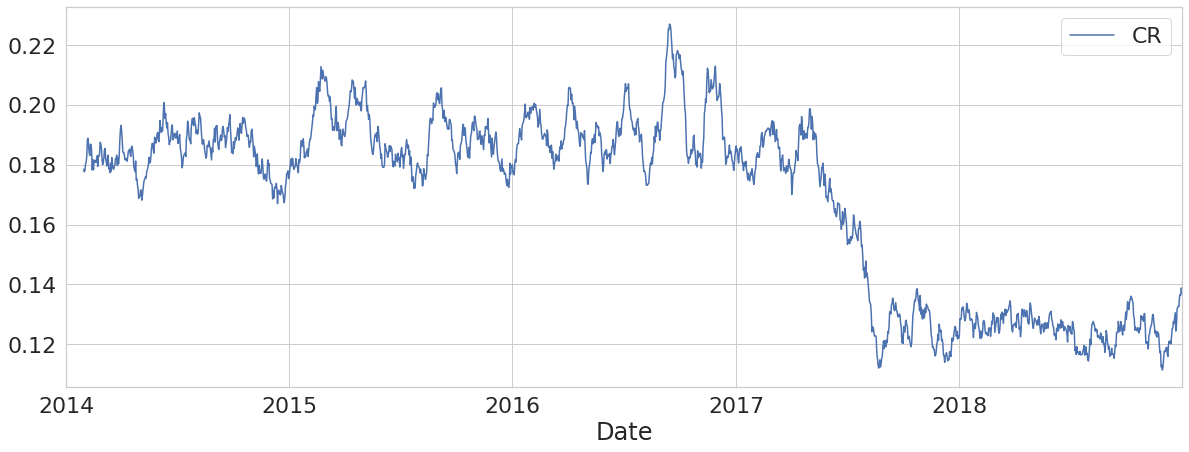

In [48]:
cr_by_day_rolling_30.plot()

In [49]:
cr_by_day_rolling_20 = order_leads.groupby(['Date'])\
    .agg({'Converted':'mean'})\
    .sort_values('Date')\
    .rename(columns={'Converted':'CR'})\
    .rolling(20).mean()

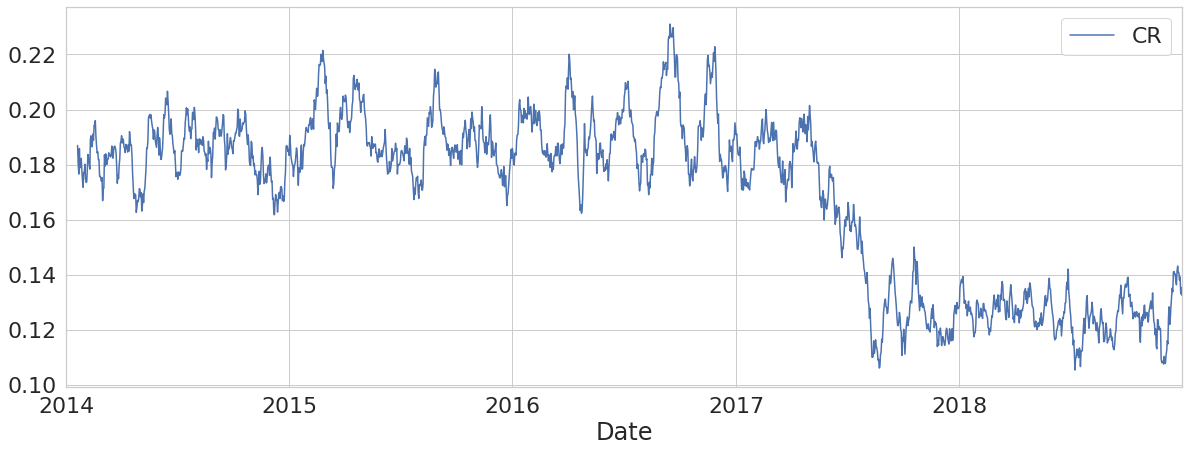

In [50]:
cr_by_day_rolling_20.plot()

In [78]:
cr_by_day_rolling_40 = order_leads.groupby(['Date'])\
    .agg({'Converted':'mean'})\
    .sort_values('Date')\
    .rename(columns={'Converted':'CR'})\
    .rolling(40).mean()

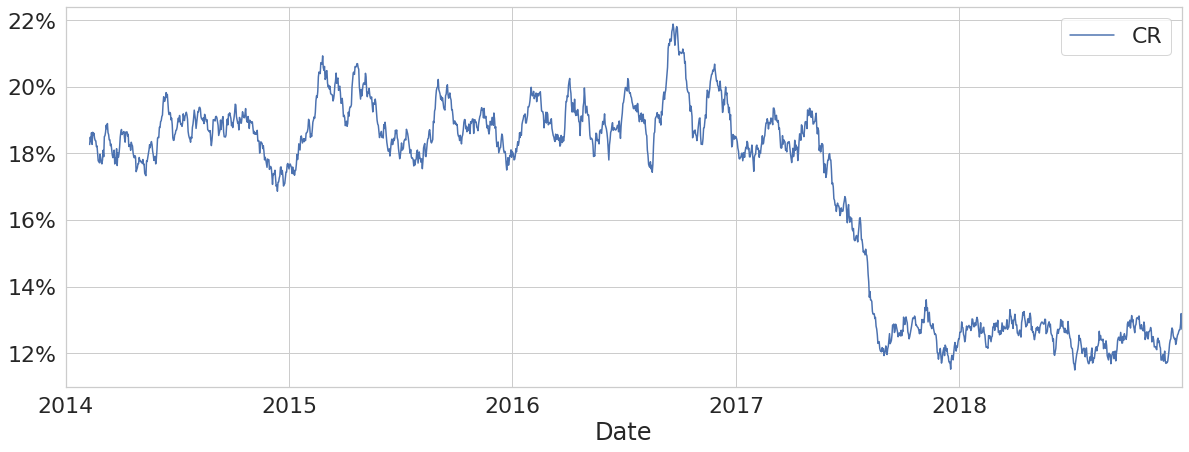

In [79]:
ax = cr_by_day_rolling_40.plot()
ax = ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])

In [81]:
cr_by_day_rolling_40_to_plot = cr_by_day_rolling_40.reset_index()

In [85]:
fig = px.line(cr_by_day_rolling_40_to_plot, x="Date", y="CR", title='CR by day, rolling 40')
fig.show()